In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv('/Users/jaspalsingh/Documents/Analytics-project/marketing_campaign.csv',sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [141]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [142]:
customer_education = df['Education'].value_counts()
print(customer_education)

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


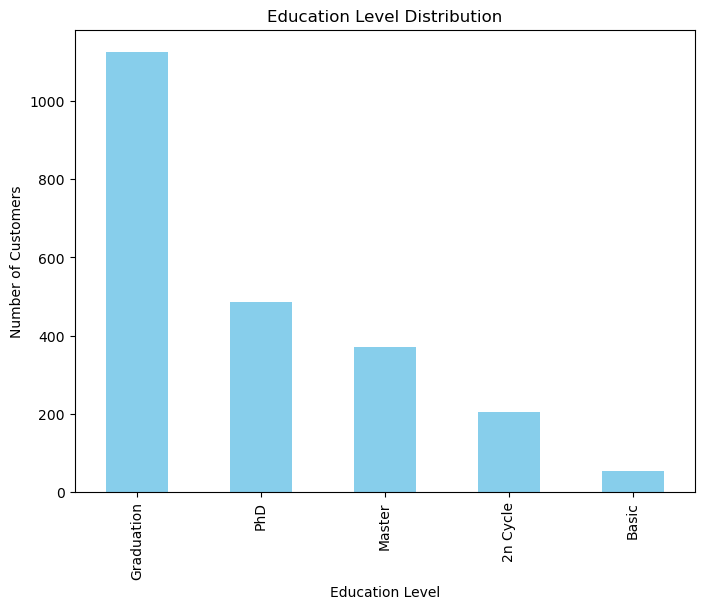

In [143]:
plt.figure(figsize=(8,6))
df['Education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.show()

### ----- Age Distribution of Customers -----##

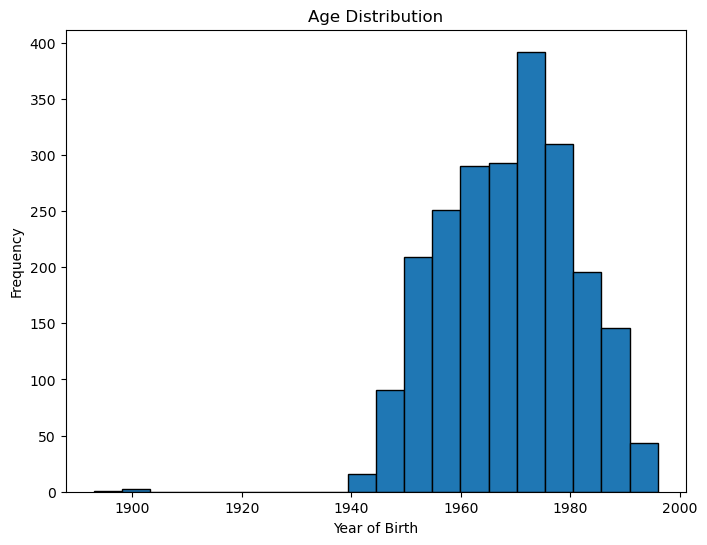

In [144]:
plt.figure(figsize=(8,6))
df['Year_Birth'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()

### ----------What is the average annual income of customers -----##

In [145]:
Avg_Income =df['Income'].mean()
print(Avg_Income)

52247.25135379061


#### ------What are the most frequently purchased products (wine, fruits, meat products, etc.)? ----#

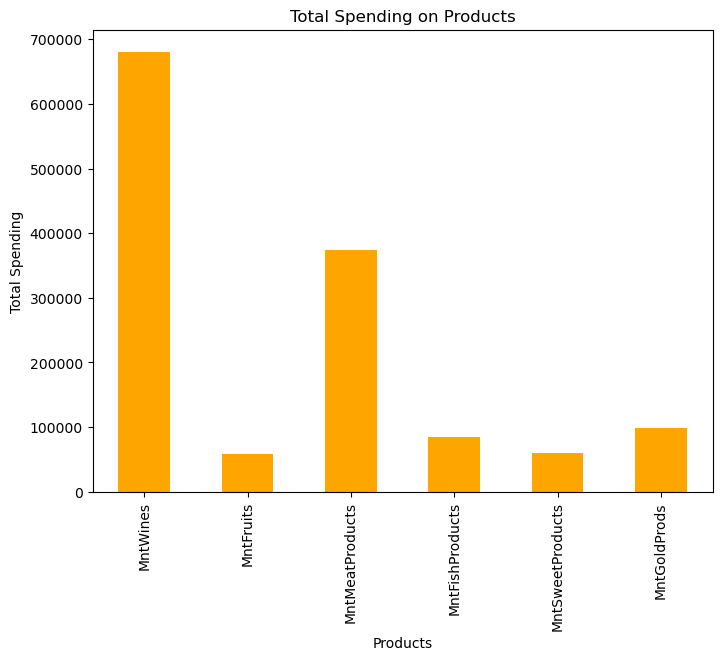

In [146]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spent = df[products].sum()
plt.figure(figsize=(8,6))
total_spent.plot(kind='bar', color='orange')
plt.title('Total Spending on Products')
plt.xlabel('Products')
plt.ylabel('Total Spending')
plt.show()

### --------How does the rate of spending on products differ between different age groups? ##

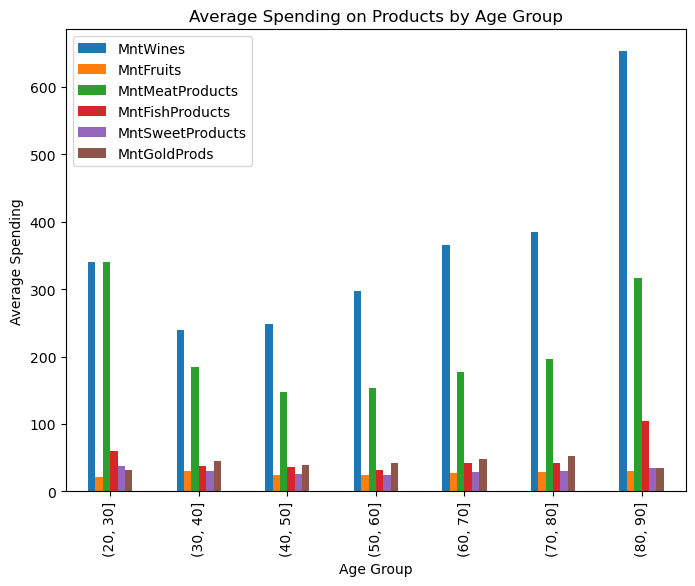

In [147]:
 df['Age'] = 2024 - df['Year_Birth']
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)

spending_by_age = df.groupby('Age_Group')[products].mean()
spending_by_age.plot(kind='bar', figsize=(8,6))
plt.title('Average Spending on Products by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.show()

### -----Is the rate of purchasing online different from purchasing in stores?----##

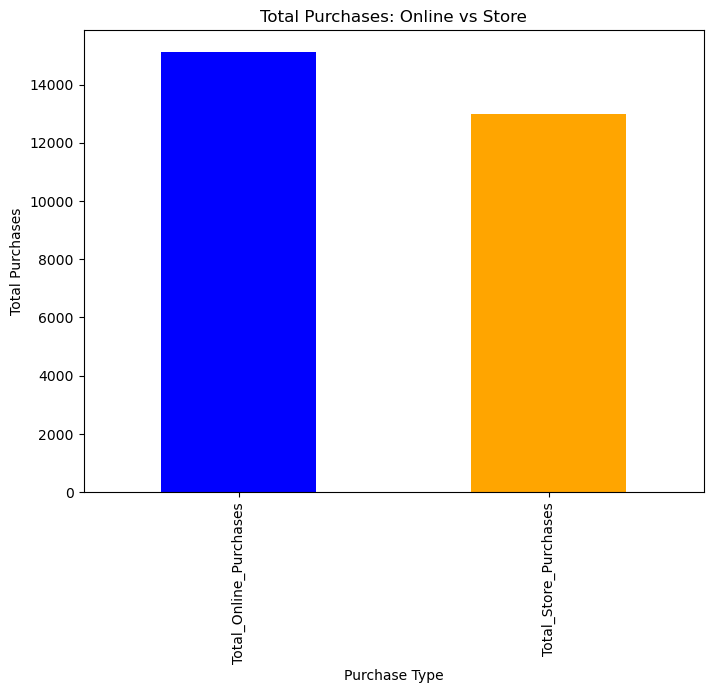

In [148]:
df['Total_Online_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
df['Total_Store_Purchases'] = df['NumStorePurchases']

online_vs_store = df[['Total_Online_Purchases', 'Total_Store_Purchases']].sum()
plt.figure(figsize=(8,6))
online_vs_store.plot(kind='bar', color=['blue', 'orange'])
plt.title('Total Purchases: Online vs Store')
plt.xlabel('Purchase Type')
plt.ylabel('Total Purchases')
plt.show()

### -----Is there a relationship between a customer's income and the number of online purchases?

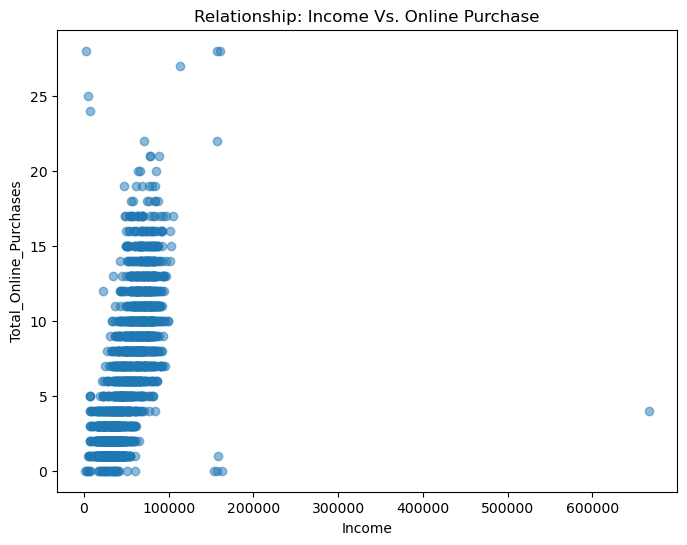

In [151]:
plt.figure(figsize=(8,6))
plt.scatter(df['Income'], df['Total_Online_Purchases'], alpha = 0.5)
plt.title('Relationship: Income Vs. Online Purchase')
plt.xlabel('Income')
plt.ylabel('Total_Online_Purchases')
plt.show()

### ---What is the relationship between age and the number of monthly visits to the site?

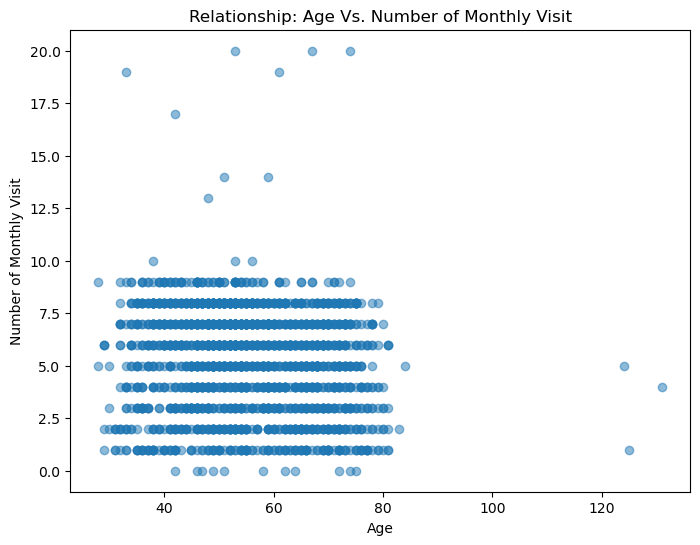

In [152]:
age = 2026 - df['Year_Birth']
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['NumWebVisitsMonth'], alpha = 0.5)
plt.title('Relationship: Age Vs. Number of Monthly Visit')
plt.xlabel('Age')
plt.ylabel('Number of Monthly Visit')
plt.show()

### ----What factors affect customer acceptance of promotional offers? --##

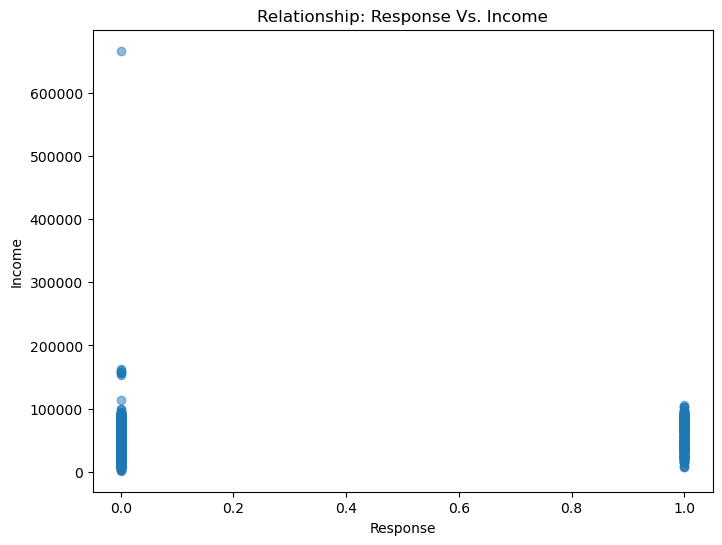

In [153]:
# -- 1) Test with income - 

plt.figure(figsize=(8,6))
plt.scatter(df['Response'], df['Income'], alpha = 0.5)
plt.title('Relationship: Response Vs. Income')
plt.xlabel('Response')
plt.ylabel('Income')
plt.show()

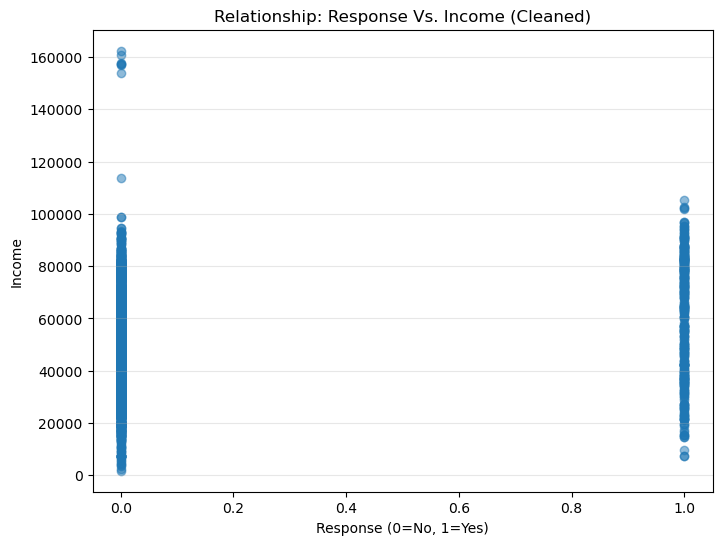

In [154]:
df_clean = df[df['Income'] < 200000]

plt.figure(figsize=(8,6))
plt.scatter(df_clean['Response'], df_clean['Income'], alpha=0.5)
plt.title('Relationship: Response Vs. Income (Cleaned)')
plt.xlabel('Response (0=No, 1=Yes)')
plt.ylabel('Income')
plt.grid(axis='y', alpha=0.3)
plt.show()

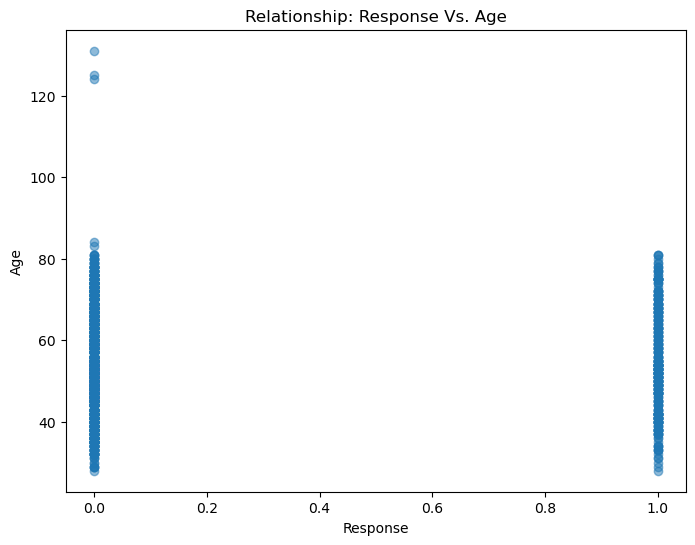

In [155]:
# -- 1) Test with Age - 

plt.figure(figsize=(8,6))
plt.scatter(df['Response'], df['Age'], alpha = 0.5)
plt.title('Relationship: Response Vs. Age')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()

## ---Is there a relationship between complaints and acceptance of promotions?

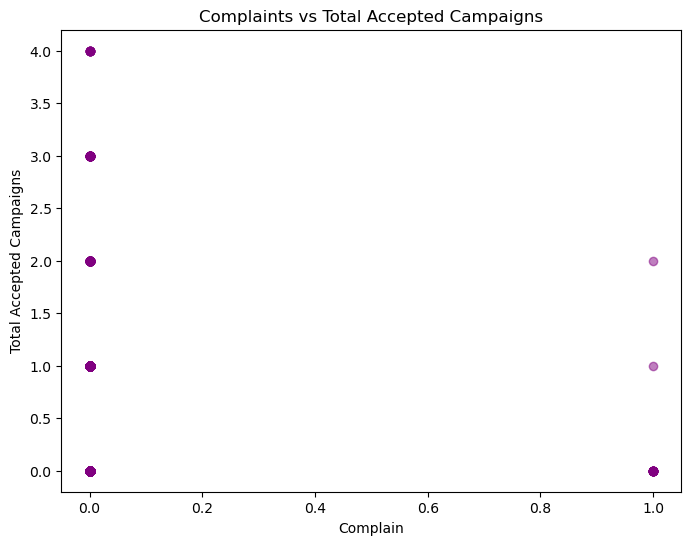

In [156]:
acceptance_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Total_Accepted_Cmp'] = df[acceptance_columns].sum(axis=1)

plt.figure(figsize=(8,6))
plt.scatter(df['Complain'], df['Total_Accepted_Cmp'], alpha=0.5, color='purple')
plt.title('Complaints vs Total Accepted Campaigns')
plt.xlabel('Complain')
plt.ylabel('Total Accepted Campaigns')
plt.show()

## ====================QUESTIONS========================##
1)Segmentation & Targeting (STP Framework):

    a) The "Gold" Cluster: Can we identify a "High-Value" segment based on spending (Mnt...) and income? What are their unique demographic traits (Education, Age, Marital Status)?
    b) The "Empty Nester" Opportunity: Does the absence of children (Kidhome, Teenhome) significantly correlate with high spending on premium products like Wine and Meat?
    c) Life-Stage Marketing: How does a customer’s "seniority" (years since enrollment Dt_Customer) affect their loyalty and total spend?
    

2)Promotion & Campaign Optimization (ROI):

    a) Campaign Conversion Elasticity: Which of the 5 campaigns was the most cost-effective? Is there a "halo effect" (e.g., does accepting Campaign 1 make a customer 3x more likely to accept Campaign 5)?
    b) The "Deal Seeker" Profile: Who are the customers with a high NumDealsPurchases? Are they high-income "smart shoppers" or low-income "necessity shoppers"? Should we stop giving them discounts to protect margins?
    c) Response Prediction: Can we build a model to predict the Response (last campaign) based on past behavior? (This is a classic "Propensity to Buy" MBA case).
   

3)Product Portfolio Analysis:

    a) Cross-Category Correlation: Do customers who buy high amounts of Meat (MntMeatProducts) also buy more Wine (MntWines)? Could we create a "Dinner Party" bundle to increase Average Order Value (AOV)?
    b) Underperformer Analysis: Why is the "Sweets" or "Fruits" category lagging? Is it a demographic issue (e.g., kids at home) or a channel issue?
    
        
## ===========================================================##        

# --------1)---------#

In [157]:
#The "Gold" Cluster: Can we identify a "High-Value" segment based on spending (Mnt...) and income?
#What are their unique demographic traits (Education, Age, Marital Status)?

In [163]:
mnt_categories = [ 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]
df[mnt_total] = df[mnt_categories].sum(axis=1)
print(mnt_total)

#TOP 10% of SPENDERS:

df_sorted = df.sort_values(by = 'mnt_total', ascending = False)
top_10_percent = int(len(df)*0.1)
mnt_categories = [ 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]
df[mnt_total] = df[mnt_categories].sum(axis=1)
#print(mnt_total)gold_cluster = df_sorted.head(top_10_percent)

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Length: 2240, dtype: int64


In [164]:
mnt_categories = [ 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]
df['mnt_total'] = df[mnt_categories].sum(axis=1)
#print(mnt_total)

df = df.copy()

df_sorted = df.sort_values(by = 'mnt_total', ascending = False)
top_10_percent = int(len(df)*0.1)
gold_cluster = df_sorted.head(top_10_percent)
print (gold_cluster[['mnt_total','Income']].head(10))


      mnt_total   Income
1572       2525  90638.0
1179       2525  90638.0
1492       2524  87679.0
987        2486  75759.0
1052       2440  69098.0
1601       2352  90226.0
1458       2349  93790.0
1288       2346  83151.0
943        2302  94384.0
1301       2302  94384.0


In [172]:
# What are their unique demographic traits (Education, Age, Marital Status)?

common_edu = gold_cluster['Education'].mode()[0]
print("Common_Education:", common_edu)

df['age'] = 2026 - df['Year_Birth']
common_age = gold_cluster['age'].mean()
print("Age:", int(common_age))

common_Marital_Status = gold_cluster['Marital_Status'].mode()[0]
print("common_Marital_Status:", common_Marital_Status )

Common_Education: Graduation
Age: 57
common_Marital_Status: Married


          MntWines  MntMeatProducts
Kidhome  -0.496297        -0.437129
Teenhome  0.004846        -0.261160


<Axes: >

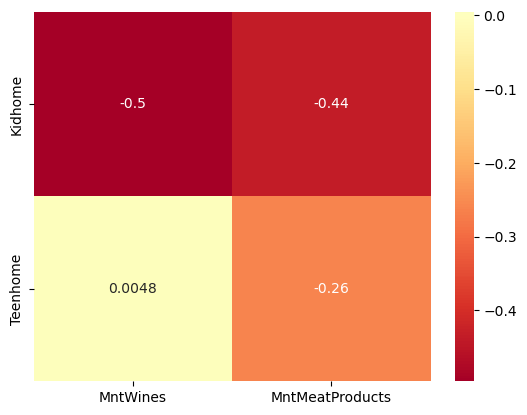

In [186]:
# b)The "Empty Nester" Opportunity: Does the absence of children (Kidhome, Teenhome) significantly correlate
# with high spending on premium products like Wine and Meat?

set_1 = ['Kidhome','Teenhome']
set_2 = ['MntWines','MntMeatProducts']

matrix = df[set_1 + set_2].corr()
cross_matrix = matrix.loc[set_1, set_2]
print(cross_matrix)

sns.heatmap(cross_matrix, annot=True, cmap='RdYlGn', center=0)

### Life-Stage Marketing: How does a customer’s "seniority" (years since enrollment Dt_Customer) affect their loyalty and total spend?

In [191]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
newest_customer = df['Dt_Customer'].max()
df['Seniority_Days'] = (newest_customer - df['Dt_Customer']).dt.days

correlation = df['Seniority_Days'].corr(df['mnt_total'])

print(correlation)

0.1588136148677149


### 2)Promotion & Campaign Optimization (ROI):

a) Campaign Conversion Elasticity: Which of the 5 campaigns was the most cost-effective? Is there a "halo effect" (e.g., does accepting Campaign 1 make a customer 3x more likely to accept Campaign 5)?
b) The "Deal Seeker" Profile: Who are the customers with a high NumDealsPurchases? Are they high-income "smart shoppers" or low-income "necessity shoppers"? Should we stop giving them discounts to protect margins?
c) Response Prediction: Can we build a model to predict the Response (last campaign) based on past behavior?

#### b) The "Deal Seeker" Profile: Who are the customers with a high NumDealsPurchases? Are they high-income "smart shoppers" or low-income "necessity shoppers"? Should we stop giving them discounts to protect margins?

In [199]:

#High NumDealsPurchases
  #  1) find income, spend of the top 20% of the deals. 
  #  2) If income, spend > average of other people in the database, then coupon is not highly required. 
  #  3) If income, spend < average of other people in the database, then coupon is highly required. 
  #  4) If income > & Spend is low than average of other people in the database, then they are there only if coupon is present.
  #  5) If income < & spend more than average of other people in the database, protect them and give them offers



TopDealpeople = df['NumDealsPurchases'].quantile(0.8)
Dealseekers = df[df['NumDealsPurchases']>= TopDealpeople]

Others = df[df['NumDealsPurchases']< TopDealpeople]

stats = pd.DataFrame({
    
    'Metric': ['Avg Income', 'Avg Total Spend'],
    'Deal Seekers': [Dealseekers['Income'].mean(), Dealseekers['mnt_total'].mean()],
    'Others':[Others['Income'].mean(), Others['mnt_total'].mean()]

  })
print(stats)


            Metric  Deal Seekers        Others
0       Avg Income  48822.984701  53891.905812
1  Avg Total Spend    533.557084    640.510245


## So we can see that Avg Income & Total Spend of Deal Seekers is less than Avg Income of others. Therefore, coupon is highly required.  Therefore we should not stop giving them coupons. 

### c) Response Prediction: Can we build a model to predict the Response (last campaign) based on past behavior?

In [210]:
print(df[features].isnull().sum())

Income               24
Kidhome               0
Teenhome              0
Recency               0
mnt_total             0
NumWebPurchases       0
NumDealsPurchases     0
AcceptedCmp1          0
AcceptedCmp2          0
AcceptedCmp3          0
AcceptedCmp4          0
AcceptedCmp5          0
dtype: int64


In [221]:
X_clean = imputer.fit_transform(X)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42, stratify=y)

In [223]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


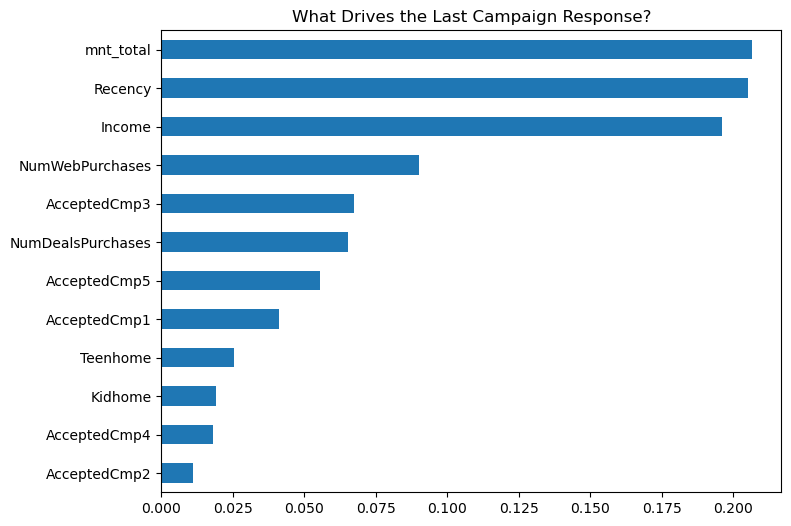

In [224]:
# Get importance scores
importances = pd.Series(model.feature_importances_, index=features).sort_values()

plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title('What Drives the Last Campaign Response?')
plt.show()

Model Accuracy: 88.62%

--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       381
           1       0.74      0.37      0.50        67

    accuracy                           0.89       448
   macro avg       0.82      0.67      0.72       448
weighted avg       0.87      0.89      0.87       448



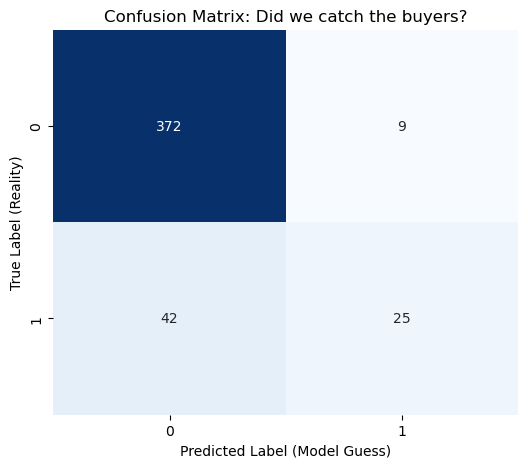

In [225]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ask the model to predict the Test Set
y_pred = model.predict(X_test)

# 2. Calculate the basic Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# 3. Print the Detailed Report (Precision, Recall, F1)
print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred))

# 4. Visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label (Model Guess)')
plt.ylabel('True Label (Reality)')
plt.title('Confusion Matrix: Did we catch the buyers?')
plt.show()

### 1.  The Good News: High Precision
Look at the Precision for 1 (0.74).
This means when your model identifies someone as a "Buyer," it is correct 74% of the time.

Business Impact: This is great for ROI. If you send 100 emails based on this model, 74 of them go to real responders. You aren't annoying your customers with spam they don't want.

### 2. The Bad News: Low Recall
Look at the Recall for 1 (0.37).

This is your "blind spot." Out of every 100 people who were actually going to buy, your model only found 37 of them. You missed 63% of your potential revenue!

Why this happened: The model is "conservative." Because the dataset has way more 0s than 1s (381 vs 67), the model is afraid to guess "1" unless it is absolutely certain.
    
    
    
### 3. How to Improve This (The Interview Answer)
If an interviewer asks, "88% accuracy is fine, but how do we find those missing buyers?", you should suggest these two specific techniques:

A. Adjust the "Probability Threshold": By default, the model says "Yes" if the probability is > 50%. We can lower it to 30%. We will get more "False Alarms," but we will catch way more of those 42 missing buyers.

B. SMOTE (Oversampling): We can artificially create "synthetic" examples of buyers so the model has more "1s" to learn from. This balances the 381 vs 67 gap.

### 3)Product Portfolio Analysis:

####    a) Cross-Category Correlation: Do customers who buy high amounts of Meat (MntMeatProducts) also buy more Wine (MntWines)? Could we create a "Dinner Party" bundle to increase Average Order Value (AOV)?


In [227]:
Meat_Wine = df['MntMeatProducts'].corr(df['MntWines'])
print(Meat_Wine)

0.5626665141603636


In [236]:
 Mean_meat = df['MntMeatProducts'].mean()
 Mean_Wines = df['MntWines'].mean()

# 2. Create the segments
df['Segment'] = 'Other'
df.loc[(df['MntMeatProducts'] > Mean_meat) & (df['MntWines'] > Mean_Wines), 'Segment'] = 'Dinner Party'

# 3. Compare their Total Spend (AOV)
comparison = df.groupby('Segment')['mnt_total'].mean()
print(comparison)


Segment
Dinner Party    1421.537367
Other            332.588796
Name: mnt_total, dtype: float64


####    b) Underperformer Analysis: Why is the "Sweets" or "Fruits" category lagging? Is it a demographic issue (e.g., kids at home) or a channel issue?

In [238]:
# check if kids at home parents buying less sweets or fruits. 


# Compare Sweet spend based on children at home
sweet_kids = df.groupby('Kidhome')['MntSweetProducts'].mean()
fruit_kids = df.groupby('Kidhome')['MntFruits'].mean()

print("Average spend on sweet by Number of Kids:\n", sweet_kids)
print("\nAverage spend on Fruit by Number of Kids:\n", fruit_kids)


Average spend on sweet by Number of Kids:
 Kidhome
0    40.498840
1     8.932147
2     4.708333
Name: MntSweetProducts, dtype: float64

Average spend on Fruit by Number of Kids:
 Kidhome
0    39.392885
1     8.517241
2     6.770833
Name: MntFruits, dtype: float64


In [239]:
# Correlation with Shopping Channels
store_corr = df['MntSweetProducts'].corr(df['NumStorePurchases'])
web_corr = df['MntSweetProducts'].corr(df['NumWebPurchases'])

print(f"Store-Sweets Correlation: {store_corr:.2f}")
print(f"Web-Sweets Correlation: {web_corr:.2f}")

Store-Sweets Correlation: 0.45
Web-Sweets Correlation: 0.35
